<a href="https://colab.research.google.com/github/jlvoltan/bootcamp_python/blob/master/m2_cap4_2_boot_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 2 - Cap 4 (cont) - Bootcamp PYTHON**
*Atualizado em 31 JUL 2020* 



# Regressão Linear
X $\beta$ = Y

onde  $\beta$ = $\left[ \begin{array}{l}
a\\
b
\end{array}\right]$



Via menor erro quadrático médio:

$\beta$ = ($X^T$ X)^-1 $X^T$ Y


onde ($X^T$ X)^-1 $X^T$ é a pseudo-inversa de X, usamos *np.linalg.pinv(X)*

* determninar uma função que melhor represente aquele conjunto de pontos
* critério do erro quadrático:  $\sum(X - X')^2$
* No caso da procura por uma reta, equação:  Y = aX + b
* A ideia é que atraves da solução do sistema, poderiamos encontrar a reta.
  * Existem alguns complicadores,pois os pontos não estão necessariamente na reta, mas a reta me dá o erro quadrático mínimo. Os pontos são próximos a reta.

## Exemplo

Exemplo extraído de https://www.ime.unicamp.br/~hlachos/regresslide.pdf:

O gerente de uma cadeia de supermercados deseja
desenvolver um modelo com a finalidade de estimar as
vendas médias semanais (em milhares de dólares)
Y - Vendas semanais; e
X - Número de clientes.
Estas variáveis foram observadas em 20 supermercados
escolhidos aleatóriamente.

In [31]:
X = "907 926 506 741 789 889 874 510 529 420 679 872 924 607 452 729 794 844 1010 621"
Y = "11,20 11,05 6,84 9,21 9,42 10,08 9,45 6,73 7,24 6,12 7,63 9,43 9,46 7,64 6,92 8,95 9,33 10,23 11,77 7,41"

#Tratando a mudança da virgula pelo ponto, e a inserção do separador vírgula
X=X.replace(" ",",")
Y=Y.replace(",",".")
Y=Y.replace(" ",",")
print("X: \n", X)
print("Y: \n", Y)

X: 
 907,926,506,741,789,889,874,510,529,420,679,872,924,607,452,729,794,844,1010,621
Y: 
 11.20,11.05,6.84,9.21,9.42,10.08,9.45,6.73,7.24,6.12,7.63,9.43,9.46,7.64,6.92,8.95,9.33,10.23,11.77,7.41


In [32]:
X=[907,926,506,741,789,889,874,510,529,420,679,872,924,607,452,729,794,844,1010,621]
Y=[11.20,11.05,6.84,9.21,9.42,10.08,9.45,6.73,7.24,6.12,7.63,9.43,9.46,7.64,6.92,8.95,9.33,10.23,11.77,7.41]

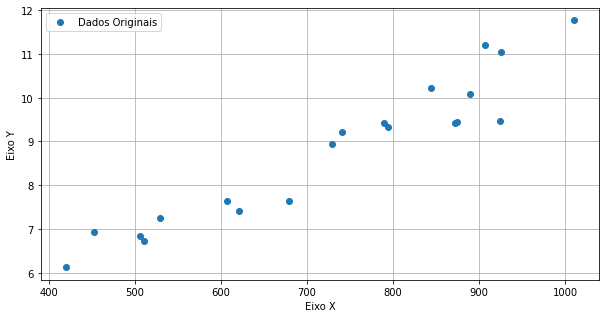

In [33]:
#Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(X,Y,'o',label="Dados Originais")
plt.legend()
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.grid()
plt.show()

## Numpy

In [34]:
import numpy as np

X = np.array(X).reshape(-1,1) #replace pra forçar a ser um vetor coluna
Y = np.array(Y).reshape(-1,1) 

#Adicionando bias para estimar o termo b
Xl = np.hstack((X, np.ones(X.shape)))
print(Xl)

[[9.07e+02 1.00e+00]
 [9.26e+02 1.00e+00]
 [5.06e+02 1.00e+00]
 [7.41e+02 1.00e+00]
 [7.89e+02 1.00e+00]
 [8.89e+02 1.00e+00]
 [8.74e+02 1.00e+00]
 [5.10e+02 1.00e+00]
 [5.29e+02 1.00e+00]
 [4.20e+02 1.00e+00]
 [6.79e+02 1.00e+00]
 [8.72e+02 1.00e+00]
 [9.24e+02 1.00e+00]
 [6.07e+02 1.00e+00]
 [4.52e+02 1.00e+00]
 [7.29e+02 1.00e+00]
 [7.94e+02 1.00e+00]
 [8.44e+02 1.00e+00]
 [1.01e+03 1.00e+00]
 [6.21e+02 1.00e+00]]


In [35]:
#Estimando a e b da matriz Beta
beta = np.linalg.pinv(Xl).dot(Y)
print(beta)

[[0.00872934]
 [2.4230444 ]]


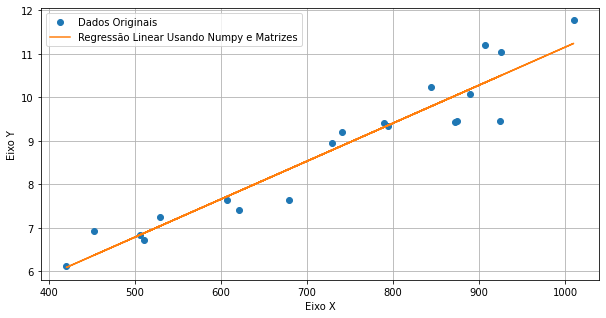

In [36]:
# Gráfico com retas (aproximação pelo modelo) e pontos
plt.figure(figsize=(10,5))
plt.plot(X,Y,'o',label="Dados Originais")
plt.plot(X,Xl.dot(beta),label="Regressão Linear Usando Numpy e Matrizes")
plt.legend()
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.grid()
plt.show()

# Scikit-learn

### Criando e treinando o Modelo

In [37]:
from sklearn.linear_model import LinearRegression

#Transformando os dados em um Numpy Array
X = np.array(X).reshape(-1,1) #replace pra forçar a ser um vetor coluna
Y = np.array(Y).reshape(-1,1) 

#Criando o modelo
modelo_regressao = LinearRegression()

#treinando o modelo
modelo_regressao.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Extraindo dados do Modelo

In [38]:
# A reta é dada por: ax + b
print("Sendo a reta ax + b")
print("Onde a= "+ str(modelo_regressao.coef_.ravel()[0]) + " e b= " +str(modelo_regressao.intercept_[0]))


Sendo a reta ax + b
Onde a= 0.008729338171473583 e b= 2.42304439592709


### Prevendo valores

In [39]:
y_predito = modelo_regressao.predict(X)

### Avaliando o modelo criado
* Score do modelo - *score()* : Pode-se usar os dados de entrada. 
* Existem outras técnicas, como divisão do conjunto de dados em dois grupos, um para criar o modelo e outro para avaliá-lo.
* Pode-se usar o erro quadrático médio, dentre outros



* **Erro Quadrático Médio:** Faz-se a diferença entre o valor real de Y e o valor previsto pelo modelo. Essa difereça é elevada ao quadrado (pois o sinal não importa). Soma-se isso para todos os pontos. Ao final divide-se pelo número de pontos somados (média).

  **MSR = $\frac{1}{n}$  $\sum_{0}^{n} (y -y')^{2}$**

onde *y* é o valor real, enquanto *y'* o valor previsto pelo modelo.

* **Coeficiente de determinação $R^2$**
  * Supondo um modelo que pegue a média dos falores de y, e sempre preveja esse valor (média) como sendo o valor correnpondente para y. Independente do valor de x, ele "chuta" o valor da média para y. O erro quadrático médio desse modelo, chamaremos de **$MSR_2$**
  * Coeficiente de determinação $R^2$ usa a comparação entre o erro quadrático médio desse modelo (**$MSR_2$**)com o do modelo que estamos estudando (**$MSR_1$**). 

     $R^2$ = 1 - $\frac{MSR_1}{MSR_2}$

    * Quanto mais próximo de 1, melhor.

In [40]:
score = modelo_regressao.score(X,Y)
print("O score (R2) obtido para os dados de entrada foi: ", score)

O score (R2) obtido para os dados de entrada foi:  0.9118592197429437


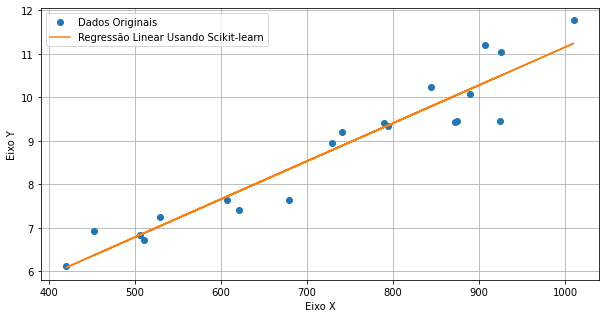

In [41]:
# Gráfico com retas (aproximação pelo modelo) e pontos
plt.figure(figsize=(10,5))
plt.plot(X,Y,'o',label="Dados Originais")
plt.plot(X,y_predito,label="Regressão Linear Usando Scikit-learn")
plt.legend()
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.grid()
plt.show()